In [1]:
import silq
silq.initialize('Serwan')
%matplotlib notebook

Initializing imports


<IPython.core.display.Javascript object>

Initializing functions
Initialization complete


In [2]:
def try_close(*instruments):
    for instrument in instruments:
        try:
            exec('{}.close()'.format(instrument))
        except:
            pass

In [3]:
# Load instruments
import qcodes.instrument_drivers.lecroy.ArbStudio1104 as arbstudio_driver
dll_path = os.path.join(os.getcwd(),'C:\Lecroy_driver\\Library\\ArbStudioSDK.dll')
arbstudio = arbstudio_driver.ArbStudio1104('ArbStudio', dll_path)

In [4]:
import qcodes.instrument_drivers.AlazarTech.ATS9440 as ATS_driver
import qcodes.instrument_drivers.AlazarTech.ATS_acquisition_controllers as ATS_controller_driver

try_close('ATS', 'ATS_controller')
ATS = ATS_driver.ATS9440('ATS', server_name=None)
ATS_controller = ATS_controller_driver.Basic_AcquisitionController(name='ATS_controller', 
                                                           alazar_name='ATS',
                                                           server_name=None)

In [5]:
def configure_arbstudio(arbstudio):
    # Program arbstudio
    arbstudio_channels = [1,3]

    waveforms = [[0]*100, [1]*100]
    sequence = [0, 1]
    for ch in arbstudio_channels:
        eval('arbstudio.ch{}_trigger_source("start")'.format(ch))
        eval('arbstudio.ch{}_sampling_rate_prescaler(256)'.format(ch))
        eval('arbstudio.ch{}_clear_waveforms()'.format(ch))
        eval("arbstudio.ch{}_trigger_mode('continuous')".format(ch))
        for waveform in waveforms:
            eval('arbstudio.ch{}_add_waveform(waveform)'.format(ch))
        eval('arbstudio.ch{}_sequence({})'.format(ch, sequence))
    arbstudio.load_waveforms(channels=arbstudio_channels)
    arbstudio.load_sequence(channels=arbstudio_channels)

def configure_ATS(ATS):
    ATS.config(trigger_source1='CHANNEL_C',
               trigger_level1=140,
               trigger_slope1='TRIG_SLOPE_POSITIVE',
               external_trigger_coupling='DC',
               trigger_operation='TRIG_ENGINE_OP_J',
               channel_range=2,
               sample_rate=1e6,
               coupling='DC')

def configure_ATS_controller(ATS_controller, average_mode='none'):
    buffer_timeout = 10000  

    ATS_controller.average_mode(average_mode)
    ATS_controller.update_acquisitionkwargs(samples_per_record=1600,
                                             records_per_buffer=1,
                                             buffers_per_acquisition=5,
                                             buffer_timeout=buffer_timeout,
                                             channel_selection='AC')


In [6]:
arbstudio.stop()
configure_arbstudio(arbstudio)
configure_ATS(ATS)
configure_ATS_controller(ATS_controller)

In [7]:
arbstudio.stop()
arbstudio.run([1,3])
traces, traces_AWG = ATS_controller.acquisition()
arbstudio.stop()
# plot_traces(traces)

number of channels: 2
size_bytes: 6400
number of channels: 2
size_bytes: 6400
ADDING BUFFER
ADDING BUFFER
ADDING BUFFER
ADDING BUFFER
ADDING BUFFER


<IPython.core.display.Javascript object>


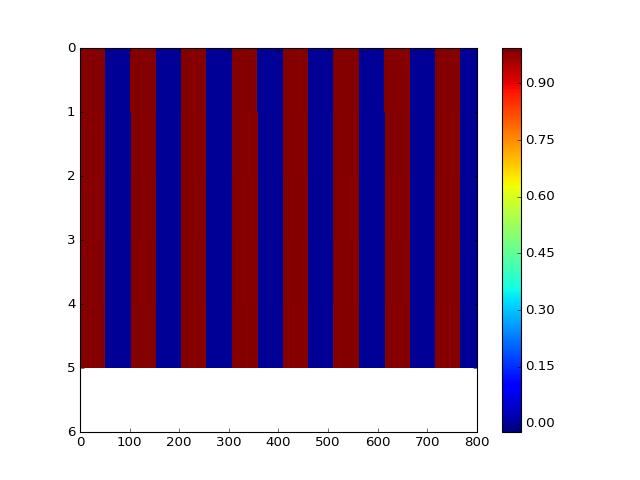

<IPython.core.display.Javascript object>


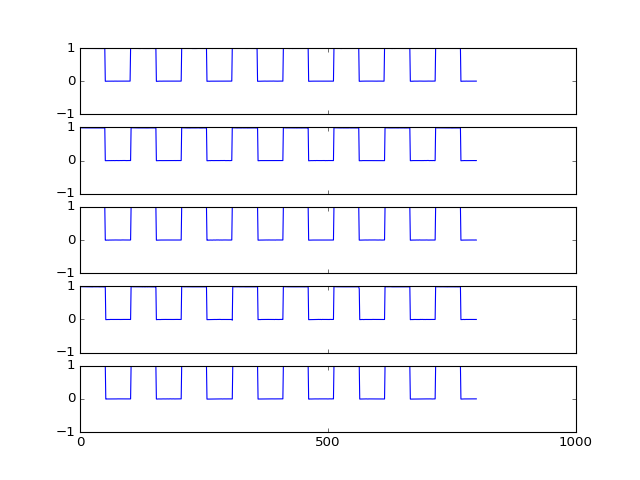

In [8]:
plot_traces(traces[:,::2])